Exploratory Data Analysis of EPA NPL Data

In [ ]:
# EPA Document 406194 CSV file
import pandas as pd

site_df = pd.read_csv('C:/Users/ariaz/OneDrive/EVE 310/Final Project/406194_eve_epa_sites_data.csv')

site_df.head()

,Region,Site Name,EPA ID,Address 1,Address 2,City,State,Zip Code,County,Primary Latitude,...,Site Category,Category Code,HRS Score,Listing (Finalized) Date,Proposed Date,Deleted Date,Preferred Contaminant Name,CAS Number,Site ID,Site Description
0,1,ATLAS TACK CORP.,MAD001026319,PLEASANT ST,NaN,FAIRHAVEN,MA,02719,BRISTOL,41.635561,...,Manufacturing/Processing/Maintenance,MP,42.599998,2/21/1990,6/24/1988,NaN,"1,2-DIHYDROACENAPHTHYLENE",83-32-9,100376,The Atlas Tack Corp. site is located in Fairha...
1,1,ATLAS TACK CORP.,MAD001026319,PLEASANT ST,NaN,FAIRHAVEN,MA,02719,BRISTOL,41.635561,...,Manufacturing/Processing/Maintenance,MP,42.599998,2/21/1990,6/24/1988,NaN,"1,3-DICHLOROBENZENE",541-73-1,100376,The Atlas Tack Corp. site is located in Fairha...
2,1,ATLAS TACK CORP.,MAD001026319,PLEASANT ST,NaN,FAIRHAVEN,MA,02719,BRISTOL,41.635561,...,Manufacturing/Processing/Maintenance,MP,42.599998,2/21/1990,6/24/1988,NaN,"1,4-DICHLOROBENZENE",106-46-7,100376,The Atlas Tack Corp. site is located in Fairha...
3,1,ATLAS TACK CORP.,MAD001026319,PLEASANT ST,NaN,FAIRHAVEN,MA,02719,BRISTOL,41.635561,...,Manufacturing/Processing/Maintenance,MP,42.599998,2/21/1990,6/24/1988,NaN,"2,4-DINITROTOLUENE",121-14-2,100376,The Atlas Tack Corp. site is located in Fairha...
4,1,ATLAS TACK CORP.,MAD001026319,PLEASANT ST,NaN,FAIRHAVEN,MA,02719,BRISTOL,41.635561,...,Manufacturing/Processing/Maintenance,MP,42.599998,2/21/1990,6/24/1988,NaN,2-CHLORONAPHTHALENE,91-58-7,100376,The Atlas Tack Corp. site is located in Fairha...


In [11]:
# Top Contaminants within NPL Sites
top_contaminants = site_df['Preferred Contaminant Name'].value_counts(10)
contaminant_df = top_contaminants.reset_index(name='count')
contaminant_df.head()

,Preferred Contaminant Name,count
0,LEAD,0.022252
1,ARSENIC,0.021574
2,TRICHLOROETHENE,0.019115
3,BENZENE,0.018098
4,CHROMIUM,0.018098


In [ ]:
# Top Site Categories within NPL Sites
site_categories = site_df['Site Category'].value_counts()
site_cat_df = site_categories.reset_index(name='count')
site_cat_df.head(10)

,Site Category,count
0,Waste Management,16059
1,Manufacturing/Processing/Maintenance,15310
2,Other,7648
3,Recycling,3268
4,Manufacturing/Processing/Maintenance; Manufact...,659
5,Waste Management; Waste Management; Waste Mana...,437
6,Mining,407
7,Other; Other,282
8,Recycling; Recycling; Recycling,272
9,Manufacturing/Processing/Maintenance; Multiple...,256


In [9]:
!pip install folium



count    44576.000000
mean        43.168144
std         10.274304
min          0.000000
25%         34.560001
50%         42.470001
75%         50.000000
max         86.599998
Name: HRS Score, dtype: float64

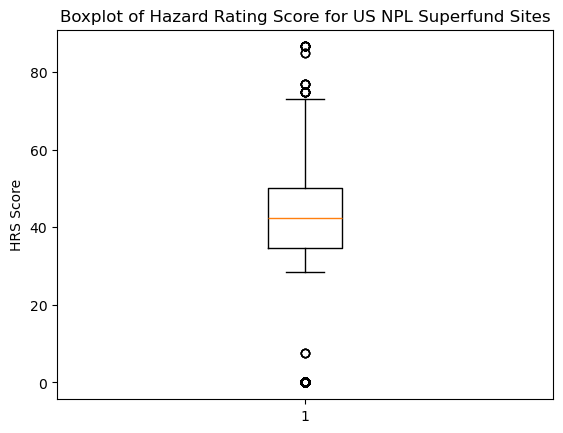

In [ ]:
# Boxplot to understand the central tendency of HRS Score across all NPL Sites
import matplotlib.pyplot as plt
import pandas as pd

site_df['HRS Score'] = pd.to_numeric(site_df['HRS Score'], errors='coerce')
hrs = site_df['HRS Score'].dropna()
plt.boxplot(hrs, vert = True)
plt.title('Boxplot of Hazard Rating Score for US NPL Superfund Sites')
plt.ylabel('HRS Score')

site_df['HRS Score'].describe()


In [ ]:
#Filtering for top 6 contaminants and then top 5 site categories
top_npl_contaminants = site_df['Preferred Contaminant Name'].value_counts().nlargest(6).index

top_site_categories = site_df['Site Category'].value_counts().nlargest(4).index

df_top_filtered = site_df[
    (site_df['Preferred Contaminant Name'].isin(top_contaminants)) &
    (site_df['Site Category'].isin(top_site_categories))
]

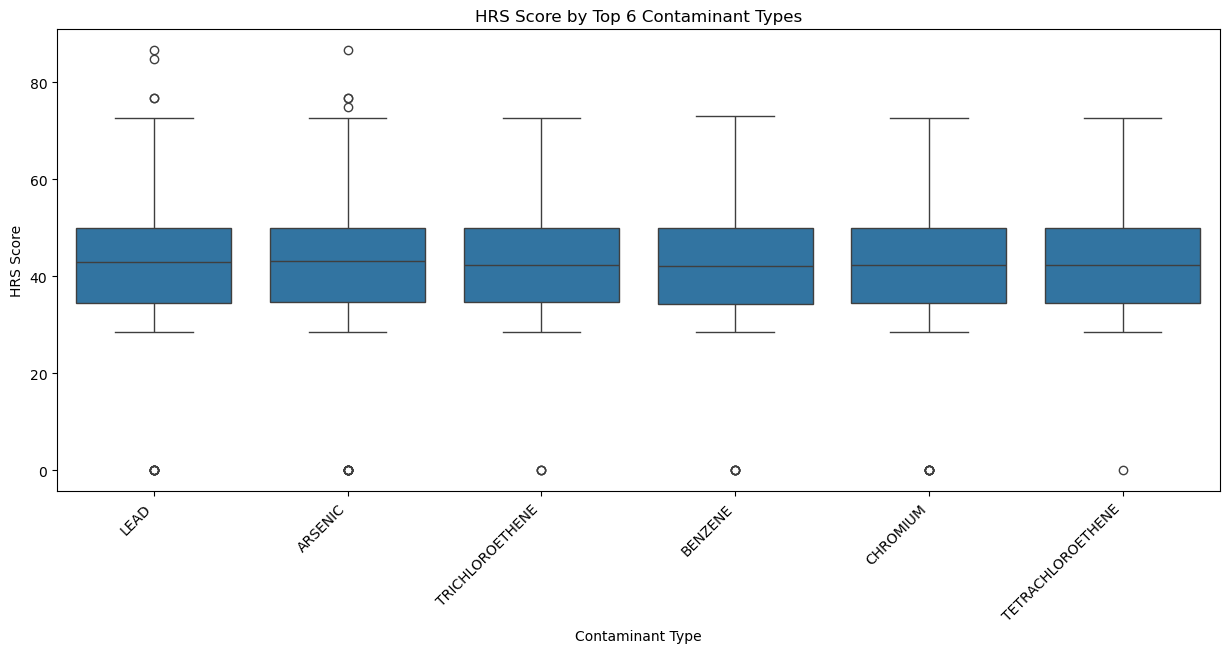

In [ ]:
# Boxplots of HRS Scores of Each NPL Contaminant
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.boxplot(
    x='Preferred Contaminant Name',
    y='HRS Score',
    data=site_df[site_df['Preferred Contaminant Name'].isin(top_npl_contaminants)],
    order=top_npl_contaminants
)
plt.xticks(rotation=45, ha='right')
plt.title("HRS Score by Top 6 Contaminant Types")
plt.ylabel("HRS Score")
plt.xlabel("Contaminant Type")
plt.show()



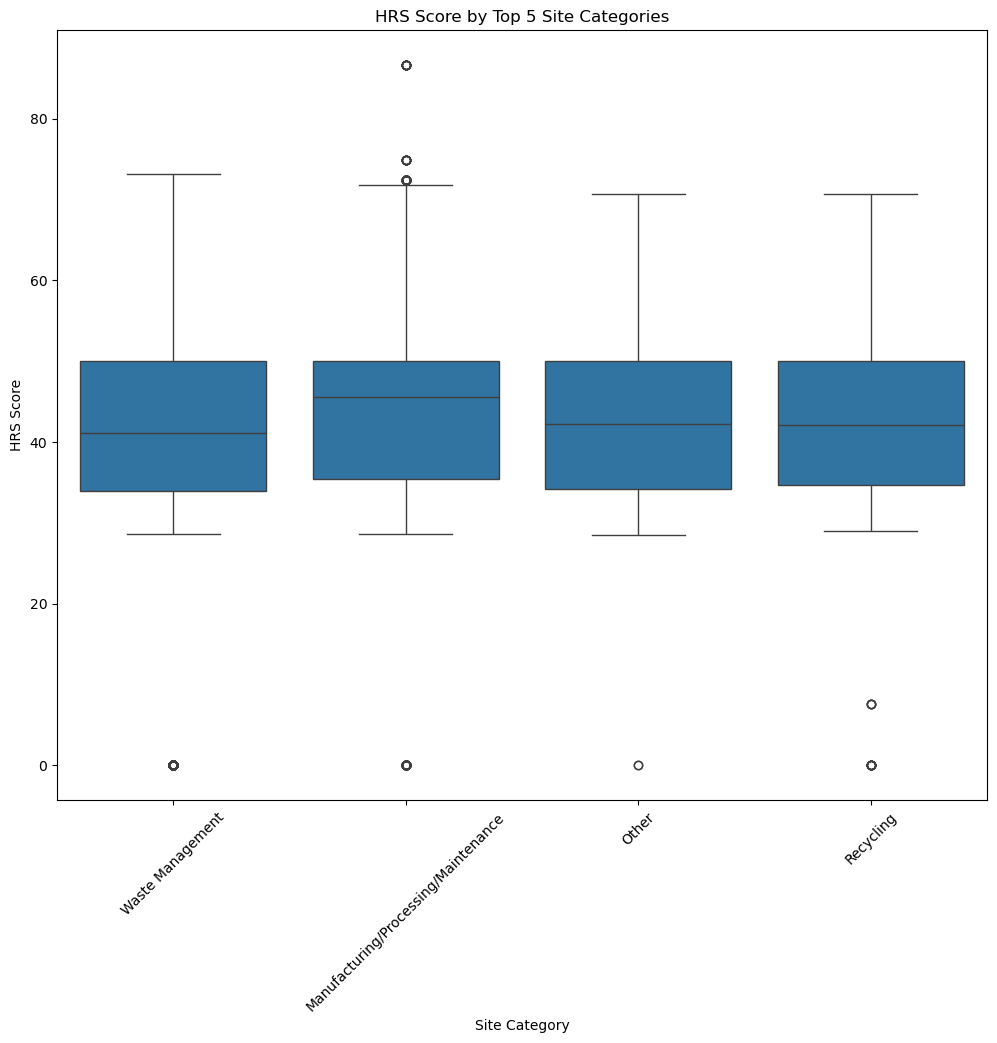

In [ ]:
# Boxplots of HRS Scores by the top site categories of NPL sites
plt.figure(figsize=(12,10))
sns.boxplot(
    x='Site Category',
    y='HRS Score',
    data=site_df[site_df['Site Category'].isin(top_site_categories)],
    order=top_site_categories
)
plt.title("HRS Score by Top 5 Site Categories")
plt.ylabel("HRS Score")
plt.xlabel("Site Category")
plt.xticks(rotation = 45)
plt.show()


CDC USCS By Area (County) Cancer Data Exploratory Data Analysis

In [ ]:
# Reading Data format of one cancer file year
cancer_eda_df = pd.read_csv('C:/Users/ariaz/OneDrive/EVE 310/Final Project/cancer_data_by_year/BYAREA_COUNTY_2011_start.TXT', sep = '|')
cancer_eda_df.head()

,STATE,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,COUNT,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
0,AK,AK: Aleutians East Borough (02013) - 1994+,~,~,~,~,Incidence,5248,All Races,Female,All Cancer Sites Combined,2011-2015,~,~,~
1,AK,AK: Aleutians East Borough (02013) - 1994+,~,~,~,~,Mortality,5248,All Races,Female,All Cancer Sites Combined,2011-2015,~,~,~
2,AK,AK: Aleutians East Borough (02013) - 1994+,~,~,~,~,Incidence,5248,All Races,Female,Brain and Other Nervous System,2011-2015,~,~,~
3,AK,AK: Aleutians East Borough (02013) - 1994+,~,~,~,~,Mortality,5248,All Races,Female,Brain and Other Nervous System,2011-2015,~,~,~
4,AK,AK: Aleutians East Borough (02013) - 1994+,~,~,~,~,Incidence,5248,All Races,Female,Cervix,2011-2015,~,~,~


In [ ]:
# Identifying what cancer counts are available
cancer_eda_df['SITE'].value_counts(dropna=True)

SITE
All Cancer Sites Combined                 110718
Brain and Other Nervous System            110718
Colon and Rectum                          110718
Esophagus                                 110718
Hodgkin Lymphoma                          110718
Kaposi Sarcoma                            110718
Leukemias                                 110718
Liver and Intrahepatic Bile Duct          110718
Larynx                                    110718
Kidney and Renal Pelvis                   110718
Myeloma                                   110718
Mesothelioma                              110718
Melanomas of the Skin                     110718
Lung and Bronchus                         110718
Urinary Bladder                           110718
Thyroid                                   110718
Pancreas                                  110718
Stomach                                   110718
Non-Hodgkin Lymphoma                      110718
Oral Cavity and Pharynx                   110718
Cervix         

In [ ]:
# Identifying our target data of incidences
cancer_eda_df['EVENT_TYPE'].value_counts(dropna=True)

EVENT_TYPE
Mortality    1380576
Incidence    1349550
Name: count, dtype: int64

In [ ]:
# Identifying Cancer Count Distribution across Gender
cancer_eda_df['SEX'].value_counts(dropna=True)

SEX
Male and Female    977550
Female             903738
Male               848838
Name: count, dtype: int64

NPL Site Data Cleanup for Merging Datasets

In [17]:
# TURNING PROPOSAL DATE TO DATETIME FORMAT
site_df['Proposed Date'] = pd.to_datetime(site_df['Proposed Date'], errors = "coerce")

In [18]:
# CLEANING SITE_DF BY DROPPING UNNECESSARY COLUMNS
site_col_drop = ['Site Name','Region', 'EPA ID','Address 1', 'Address 2', 'City', 'Zip Code', 'Primary Latitude','Primary Longitude', 'FF','NAI','Tribe Names','NPL Status', 'Site Category', 'Listing (Finalized) Date', 'Deleted Date', 'CAS Number', 'Site Description']
site_df.drop(columns = site_col_drop, inplace = True)

site_df.head()

,State,County,Category Code,HRS Score,Proposed Date,Preferred Contaminant Name,Site ID
0,MA,BRISTOL,MP,42.599998,1988-06-24,"1,2-DIHYDROACENAPHTHYLENE",100376
1,MA,BRISTOL,MP,42.599998,1988-06-24,"1,3-DICHLOROBENZENE",100376
2,MA,BRISTOL,MP,42.599998,1988-06-24,"1,4-DICHLOROBENZENE",100376
3,MA,BRISTOL,MP,42.599998,1988-06-24,"2,4-DINITROTOLUENE",100376
4,MA,BRISTOL,MP,42.599998,1988-06-24,2-CHLORONAPHTHALENE,100376


In [ ]:
# GROUPING INDIVIDUAL SITES
# NOTE THAT HRS SCORE FOR EACH SITE IS A MEAN OF EACH CONTAMINANT ENTRY
site_agg_df = site_df.groupby(['State', 'County', 'Category Code', 'Site ID', 'Proposed Date']).agg(
HRS_Score =('HRS Score', 'mean'), Site_Contaminants = ('Preferred Contaminant Name', lambda x: ','.join(x.unique()))).reset_index()
site_agg_df.head()

,State,County,Category Code,Site ID,Proposed Date,HRS_Score,Site_Contaminants
0,AK,ANCHORAGE,RE; RE; RE; RE; RE,1000073,1989-07-14,46.250000,"1,1,1-TRICHLOROETHANE,1,1,2,2-TETRACHLOROETHAN..."
1,AK,FAIRBANKS NORTH STAR,RE,1000017,1988-06-24,30.980000,"LEAD,POLYCHLORINATED BIPHENYLS (PCBs),SULFURIC..."
2,AK,FAIRBANKS NORTH STAR,WM,1000110,1989-07-14,48.139999,"1,1,1-TRICHLOROETHANE,1,1,2,2-TETRACHLOROETHAN..."
3,AL,BALDWIN,OT,404345,1982-12-30,30.290001,BENZENE
4,AL,BUTLER,MP; MT; RE,404343,1982-12-30,53.669998,"AROCLOR 1260,POLYCHLORINATED BIPHENYLS (PCBs)"


In [ ]:
# CREATING A COLUMN FOR PROPOSAL DATE YEARS
site_agg_df['Year'] = pd.to_datetime(site_agg_df['Proposed Date']).dt.year
site_agg_df.head()

,State,County,Category Code,Site ID,Proposed Date,HRS_Score,Site_Contaminants,Year
0,AK,ANCHORAGE,RE; RE; RE; RE; RE,1000073,1989-07-14,46.250000,"1,1,1-TRICHLOROETHANE,1,1,2,2-TETRACHLOROETHAN...",1989
1,AK,FAIRBANKS NORTH STAR,RE,1000017,1988-06-24,30.980000,"LEAD,POLYCHLORINATED BIPHENYLS (PCBs),SULFURIC...",1988
2,AK,FAIRBANKS NORTH STAR,WM,1000110,1989-07-14,48.139999,"1,1,1-TRICHLOROETHANE,1,1,2,2-TETRACHLOROETHAN...",1989
3,AL,BALDWIN,OT,404345,1982-12-30,30.290001,BENZENE,1982
4,AL,BUTLER,MP; MT; RE,404343,1982-12-30,53.669998,"AROCLOR 1260,POLYCHLORINATED BIPHENYLS (PCBs)",1982


In [23]:
# DUE TO AVAILABLE COUNTY DATA ONLY BEGINNING FROM 2011 - 2018, 15-19 YEAR LATENCY CONSIDERATION, ONLY NPL SITES FROM 1996-2003 WILL BE OBSERVED
match_sites_df = site_agg_df[(site_agg_df['Year'] >= 1996) & (site_agg_df['Year'] <= 2003)]
match_sites_df['Year'].unique()

array([1999, 2000, 2003, 1998, 2001, 1996, 1997, 2002], dtype=int32)

CLEANING OF CANCER CODE

In [24]:
# CANCER TXT FILES FROM CANCER COUNTS STARTING 2011-2018

files = [
    ("C:/Users/ariaz/OneDrive/EVE 310/Final Project/cancer_data_by_year/BYAREA_COUNTY_2018_start.txt",2018),
    ("C:/Users/ariaz/OneDrive/EVE 310/Final Project/cancer_data_by_year/BYAREA_COUNTY_2017_start.TXT",2017),
    ("C:/Users/ariaz/OneDrive/EVE 310/Final Project/cancer_data_by_year/BYAREA_COUNTY_2016_start.TXT",2016),
    ("C:/Users/ariaz/OneDrive/EVE 310/Final Project/cancer_data_by_year/BYAREA_COUNTY_2015_start.txt",2015),
    ("C:/Users/ariaz/OneDrive/EVE 310/Final Project/cancer_data_by_year/BYAREA_COUNTY_2014_start.TXT",2014),
    ("C:/Users/ariaz/OneDrive/EVE 310/Final Project/cancer_data_by_year/BYAREA_COUNTY_2013_start.TXT",2013),
    ("C:/Users/ariaz/OneDrive/EVE 310/Final Project/cancer_data_by_year/BYAREA_COUNTY_2012_start.TXT",2012),
    ("C:/Users/ariaz/OneDrive/EVE 310/Final Project/cancer_data_by_year/BYAREA_COUNTY_2011_start.TXT",2011)
]

In [ ]:
# FUNCTION TO PROCESS A DATAFRAME BY START COUNT YEAR
import pandas as pd
import re
from rapidfuzz import process, fuzz

def clean_cancer_file(filepath, year, standard_counties):
   
    # Read the file
    df = pd.read_csv(filepath, sep="|")

    # CONVERT COUNT TO NUMERIC AND DROPPING ANY UNUSABLE NAN ROWS
    df['COUNT'] = pd.to_numeric(df['COUNT'], errors='coerce')

    # CONVERT AGE_ADJUSTED_RATE TO NUMERIC
    if 'AGE_ADJUSTED_RATE' in df.columns:
        df['AGE_ADJUSTED_RATE'] = (
            df['AGE_ADJUSTED_RATE']
            .astype(str)
            .str.replace(',', '', regex=False)
            .str.strip()
        )
        df['AGE_ADJUSTED_RATE'] = pd.to_numeric(df['AGE_ADJUSTED_RATE'], errors='coerce')

    df = df.dropna(subset=['COUNT']).reset_index(drop=True)

    # DROP UNNEEDED COLUMNS
    cols_to_drop = [col for col in ['AGE_ADJUSTED_CI_LOWER', 'AGE_ADJUSTED_CI_UPPER'] if col in df.columns]
    df = df.drop(columns=cols_to_drop, errors='ignore')

    # KEEP ONLY INCIDENCES
    df = df[df['EVENT_TYPE'].str.contains('Incidence', na=False)]

    # STANDARDIZATION OF COUNTY NAMES
    def standardize_area(area_str):
        area_str = re.sub(r"^\w{2}:\s*", "", area_str)
        area_str = re.sub(r"\(.*?\)", "", area_str)
        area_str = re.sub(r"-.*", "", area_str)
        area_str = re.sub(r"municipality", "", area_str, flags=re.IGNORECASE)
        area_str = re.sub(r"county", "", area_str, flags=re.IGNORECASE)
        area_str = area_str.strip().upper()

        match = process.extractOne(area_str, standard_counties, scorer=fuzz.token_sort_ratio)
        if match and match[1] >= 80:
            return match[0]
        return None

    df['AREA'] = df['AREA'].apply(standardize_area)
    df = df.dropna(subset=['AREA']).reset_index(drop=True)

    # SPLITTING YEAR RANGES FOR START COUNT YEAR
    df[['Start Count Year', 'End Count Year']] = df['YEAR'].str.split('-', expand=True)
    df['Start Count Year'] = df['Start Count Year'].astype(int)
    df['End Count Year'] = df['End Count Year'].astype(int)

    return df


In [ ]:
cancer_clean = {}   # WILL HOLD CLEANED DATAFRAMES

standard_counties = site_agg_df['County'].drop_duplicates().tolist()

for filepath, yr in files:
    cleaned = clean_cancer_file(filepath, yr, standard_counties)
    cancer_clean[yr] = cleaned

# CALL ANY DATAFRAMES BY START YEAR USING cancer_clean[2018]


Matching NPL Sites to Cancer Count in the County after 15-19 years

In [ ]:
cancer_clean[2018].head()

,STATE,AREA,AGE_ADJUSTED_RATE,COUNT,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,Start Count Year,End Count Year
0,AK,ANCHORAGE,438.5,3220.0,Incidence,709135.0,All Races,Female,All Cancer Sites Combined,2018-2022,2018,2022
1,AK,ANCHORAGE,4.9,37.0,Incidence,709135.0,All Races,Female,Brain and Other Nervous System,2018-2022,2018,2022
2,AK,ANCHORAGE,5.8,43.0,Incidence,709135.0,All Races,Female,Cervix,2018-2022,2018,2022
3,AK,ANCHORAGE,34.2,243.0,Incidence,709135.0,All Races,Female,Colon and Rectum,2018-2022,2018,2022
4,AK,ANCHORAGE,3.0,20.0,Incidence,709135.0,All Races,Female,Esophagus,2018-2022,2018,2022


In [ ]:
# FUNCTION TO GET THE CANCER COUNTS FOR EACH NPL SITES
def get_cancer_for_site(state, county, proposal_year, cancer_clean, latency=15):
    
    # Compute latency target
    target_year = proposal_year + latency

    # --- STEP 1: Search order ---
    # To maximize sites matched with cancer counts, the cancer count can come from data with start count 15 or 16 years from the proposal year
    # Try target_year, then target_year - 1, then target_year + 1
    search_years = [target_year, target_year - 1, target_year + 1]

    relevant_df = None

    # --- STEP 2: Search for closest matching cancer_clean dataset ---
    for yr in search_years:
        best_df = None
        best_distance = float('inf')

        for name, df in cancer_clean.items():
            starts = df['Start Count Year'].unique()

            # Keep only start years >= search target to 
            valid_starts = [s for s in starts if s >= yr]
            if not valid_starts:
                continue

            # Find closest start year above the target
            distance = min(valid_starts) - yr

            if distance < best_distance:
                best_distance = distance
                best_df = df

        # If a dataset was found for this search year, stop searching
        if best_df is not None:
            relevant_df = best_df
            break

    # --- STEP 3: If nothing matched at all ---
    if relevant_df is None:
        return pd.Series([None, None])

    # --- STEP 4: Filter by site, race, sex ---
    df_filtered = relevant_df[
        (relevant_df['STATE'] == state) &
        (relevant_df['AREA'] == county) &
        (relevant_df['RACE'] == 'All Races') &
        (relevant_df['SITE'] == 'All Cancer Sites Combined') &
        (relevant_df['SEX'] == 'Male and Female')
    ]

    if df_filtered.empty:
        return pd.Series([None, None])

    # --- STEP 5: Extract results ---
    total_count = df_filtered['COUNT'].sum()
    population = df_filtered['POPULATION'].iloc[0]

    return pd.Series([population, total_count])



In [50]:
# ADDS POPULATION AND TOTAL CANCER COUNT M/F COLUMNS
match_sites_df[['County_Population', 'Total_Cancer_Count_M/F']] = match_sites_df.apply(
    lambda row: get_cancer_for_site(row['State'], row['County'], row['Year'], cancer_clean, latency=15),
    axis=1
)

C:\Users\ariaz\AppData\Local\Temp\ipykernel_2856\2391850519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_sites_df[['County_Population', 'Total_Cancer_Count_M/F']] = match_sites_df.apply(


In [54]:
def get_female_cancer_count(state, county, proposal_year, cancer_clean, latency=15):

    target_year = proposal_year + latency

    # SEARCH ORDER: exact year → year-1 → year+1
    search_years = [target_year, target_year - 1, target_year + 1]

    relevant_df = None

    # --- SEARCH FOR THE BEST-MATCHING CANCER DATASET ---
    for yr in search_years:
        best_df = None
        best_distance = float('inf')

        for name, df in cancer_clean.items():
            starts = df['Start Count Year'].unique()

            # Find valid start years >= this search year
            valid_starts = [s for s in starts if s >= yr]
            if not valid_starts:
                continue

            # Choose the closest start year to the target
            distance = min(valid_starts) - yr
            if distance < best_distance:
                best_distance = distance
                best_df = df

        if best_df is not None:
            relevant_df = best_df
            break

    # --- IF NOTHING FOUND AT ALL ---
    if relevant_df is None:
        return None

    # --- FILTER FOR FEMALE / ALL RACES / ALL CANCER SITES ---
    df_filtered = relevant_df[
        (relevant_df['STATE'] == state) &
        (relevant_df['AREA'] == county) &
        (relevant_df['RACE'] == 'All Races') &
        (relevant_df['SITE'] == 'All Cancer Sites Combined') &
        (relevant_df['SEX'] == 'Female')
    ]

    if df_filtered.empty:
        return None

    # SUM TOTAL FEMALE CANCER COUNT
    total_count = df_filtered['COUNT'].sum()

    return total_count


In [ ]:
# ADDS TOTAL FEMALE CANCER COUNT COLUMN
match_sites_df['Total_Cancer_Count_Female'] = match_sites_df.apply(
    lambda row: get_female_cancer_count(row['State'], row['County'], row['Year'], cancer_clean, latency=15),
    axis=1
)

C:\Users\ariaz\AppData\Local\Temp\ipykernel_2856\4132392211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_sites_df['Total_Cancer_Count_Female'] = match_sites_df.apply(


In [56]:
# CREATING COLUMN FOR TOTAL MALE CANCER COUNTS
def get_male_cancer_count(state, county, proposal_year, cancer_clean, latency=15):
   
    target_year = proposal_year + latency

    # SEARCH ORDER: exact year → year-1 → year+1
    search_years = [target_year, target_year - 1, target_year + 1]

    relevant_df = None

    # --- SEARCH FOR THE BEST-MATCHING CANCER DATASET ---
    for yr in search_years:
        best_df = None
        best_distance = float('inf')

        for name, df in cancer_clean.items():
            starts = df['Start Count Year'].unique()

            # Find valid start years >= this search year
            valid_starts = [s for s in starts if s >= yr]
            if not valid_starts:
                continue

            # Choose the closest start year to the target
            distance = min(valid_starts) - yr
            if distance < best_distance:
                best_distance = distance
                best_df = df

        if best_df is not None:
            relevant_df = best_df
            break

    # --- IF NOTHING FOUND AT ALL ---
    if relevant_df is None:
        return None

    # Filter by state, county, Female, all races, all cancer sites
    df_filtered = relevant_df[
        (relevant_df['STATE'] == state) &
        (relevant_df['AREA'] == county) &
        (relevant_df['RACE'] == 'All Races') &
        (relevant_df['SITE'] == 'All Cancer Sites Combined') &
        (relevant_df['SEX'] == 'Male')
    ]

    if df_filtered.empty:
        return None

    total_count = df_filtered['COUNT'].sum()

    return total_count


In [57]:
# ADDING COLUMN FOR TOTAL MALE CANCER COUNTS
match_sites_df['Total_Cancer_Count_Male'] = match_sites_df.apply(
    lambda row: get_male_cancer_count(row['State'], row['County'], row['Year'], cancer_clean, latency=15),
    axis=1
)

C:\Users\ariaz\AppData\Local\Temp\ipykernel_2856\3168148920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_sites_df['Total_Cancer_Count_Male'] = match_sites_df.apply(


In [ ]:
# CREATING A COLUMN FOR CANCER COUNTS M/F FOR HISPANIC POULATIONS
def hisp_total_cancer_count(state, county, proposal_year, cancer_clean, latency=15):

    target_year = proposal_year + latency

    # SEARCH ORDER: exact target → one year before → one year after
    search_years = [target_year, target_year - 1, target_year + 1]

    relevant_df = None

    # --- SEARCH FOR BEST CANCER DATASET MATCH ---
    for yr in search_years:
        best_df = None
        best_distance = float('inf')

        for name, df in cancer_clean.items():
            starts = df['Start Count Year'].unique()

            # Accept only datasets whose start year >= searched year
            valid_starts = [s for s in starts if s >= yr]
            if not valid_starts:
                continue

            # Distance from the target (lower is better)
            distance = min(valid_starts) - yr
            if distance < best_distance:
                best_distance = distance
                best_df = df

        if best_df is not None:
            relevant_df = best_df
            break

    # --- IF NOTHING FOUND ---
    if relevant_df is None:
        return None

    # --- FILTER FOR HISPANIC, M/F, ALL CANCER SITES ---
    df_filtered = relevant_df[
        (relevant_df['STATE'] == state) &
        (relevant_df['AREA'] == county) &
        (relevant_df['RACE'] == 'Hispanic') &
        (relevant_df['SITE'] == 'All Cancer Sites Combined') &
        (relevant_df['SEX'] == 'Male and Female')
    ]

    if df_filtered.empty:
        return None

    # --- SUM TOTAL M/F HISPANIC INCIDENCE ---
    total_count = df_filtered['COUNT'].sum()

    return total_count


In [60]:
# ADDING COLUMN FOR TOTAL HISP M/F CANCER COUNTS
match_sites_df['Total_Cancer_Count_Hisp_M/F'] = match_sites_df.apply(
    lambda row: hisp_total_cancer_count(row['State'], row['County'], row['Year'], cancer_clean, latency=15),
    axis=1
)

C:\Users\ariaz\AppData\Local\Temp\ipykernel_2856\2439339639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_sites_df['Total_Cancer_Count_Hisp_M/F'] = match_sites_df.apply(


In [61]:
# CREATING COLUMN FOR HISP F CANCER COUNTS
def hisp_F_cancer_count(state, county, proposal_year, cancer_clean, latency=15):
   
    target_year = proposal_year + latency

    # SEARCH ORDER: exact target → one year before → one year after
    search_years = [target_year, target_year - 1, target_year + 1]

    relevant_df = None

    # --- SEARCH FOR BEST CANCER DATASET MATCH ---
    for yr in search_years:
        best_df = None
        best_distance = float('inf')

        for name, df in cancer_clean.items():
            starts = df['Start Count Year'].unique()

            # Accept only datasets whose start year >= searched year
            valid_starts = [s for s in starts if s >= yr]
            if not valid_starts:
                continue

            # Distance from the target (lower is better)
            distance = min(valid_starts) - yr
            if distance < best_distance:
                best_distance = distance
                best_df = df

        if best_df is not None:
            relevant_df = best_df
            break

    # --- IF NOTHING FOUND ---
    if relevant_df is None:
        return None

    # Filter by state, county, Female, all races, all cancer sites
    df_filtered = relevant_df[
        (relevant_df['STATE'] == state) &
        (relevant_df['AREA'] == county) &
        (relevant_df['RACE'] == 'Hispanic') &
        (relevant_df['SITE'] == 'All Cancer Sites Combined') &
        (relevant_df['SEX'] == 'Female')
    ]

    if df_filtered.empty:
        return None

    total_count = df_filtered['COUNT'].sum()

    return total_count

In [62]:
# ADDING COLUMN OF TOTAL HISP F CANCER COUNTS
match_sites_df['Total_Cancer_Count_Hisp_F'] = match_sites_df.apply(
    lambda row: hisp_F_cancer_count(row['State'], row['County'], row['Year'], cancer_clean, latency=15),
    axis=1
)

C:\Users\ariaz\AppData\Local\Temp\ipykernel_2856\2549590275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_sites_df['Total_Cancer_Count_Hisp_F'] = match_sites_df.apply(


In [63]:
# CREATING COLUMN FOR HISP M CANCER COUNTS
def hisp_M_cancer_count(state, county, proposal_year, cancer_clean, latency=15):
   
    target_year = proposal_year + latency

    # SEARCH ORDER: exact target → one year before → one year after
    search_years = [target_year, target_year - 1, target_year + 1]

    relevant_df = None

    # --- SEARCH FOR BEST CANCER DATASET MATCH ---
    for yr in search_years:
        best_df = None
        best_distance = float('inf')

        for name, df in cancer_clean.items():
            starts = df['Start Count Year'].unique()

            # Accept only datasets whose start year >= searched year
            valid_starts = [s for s in starts if s >= yr]
            if not valid_starts:
                continue

            # Distance from the target (lower is better)
            distance = min(valid_starts) - yr
            if distance < best_distance:
                best_distance = distance
                best_df = df

        if best_df is not None:
            relevant_df = best_df
            break

    # --- IF NOTHING FOUND ---
    if relevant_df is None:
        return None

    # Filter by state, county, Female, all races, all cancer sites
    df_filtered = relevant_df[
        (relevant_df['STATE'] == state) &
        (relevant_df['AREA'] == county) &
        (relevant_df['RACE'] == 'Hispanic') &
        (relevant_df['SITE'] == 'All Cancer Sites Combined') &
        (relevant_df['SEX'] == 'Male')
    ]

    if df_filtered.empty:
        return None

    total_count = df_filtered['COUNT'].sum()

    return total_count

In [64]:
# ADDING COLUMN FOR HISP M CANCER COUNTS
match_sites_df['Total_Cancer_Count_Hisp_M'] = match_sites_df.apply(
    lambda row: hisp_M_cancer_count(row['State'], row['County'], row['Year'], cancer_clean, latency=15),
    axis=1
)

C:\Users\ariaz\AppData\Local\Temp\ipykernel_2856\3879169805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_sites_df['Total_Cancer_Count_Hisp_M'] = match_sites_df.apply(


In [ ]:
# FUNCTION TO CREATE A COLUMN FOR ALL CANCER RATES
def get_all_cancer_rate(state, county, proposal_year, cancer_clean, latency=15):
    """
    Returns the AGE_ADJUSTED_RATE for:
      - All Cancer Sites Combined
      - Male and Female
      - All Races
    for the earliest cancer dataset whose Start Count Year >= proposal_year + latency.
    """
    target_year = proposal_year + latency
    best_df = None
    best_distance = float('inf')

    # Find best matching cancer dataset
    for name, df in cancer_clean.items():
        starts = df['Start Count Year'].unique()

        valid_starts = [s for s in starts if s >= target_year]
        if not valid_starts:
            continue

        # Choose the closest start year above target
        distance = min(valid_starts) - target_year

        if distance < best_distance:
            best_distance = distance
            best_df = df

    if best_df is None:
        return None

    # Filter the selected cancer dataframe
    filtered = best_df[
        (best_df['STATE'] == state) &
        (best_df['AREA'] == county) &
        (best_df['SITE'] == 'All Cancer Sites Combined') &
        (best_df['RACE'] == 'All Races') &
        (best_df['SEX'] == 'Male and Female')
    ]

    if filtered.empty:
        return None

    # Could be multiple rows; take mean rate or sum — you decide.
    # Rate is already population-adjusted, so mean is correct.
    return filtered['AGE_ADJUSTED_RATE'].mean()


In [ ]:
# ADDING A COLUMN FOR THE COUNTY'S CANCER RATE FOR ALL CANCERS
match_sites_df['Combined_Cancer_Rate'] = match_sites_df.apply(
    lambda row: get_all_cancer_rate(
        row['State'], 
        row['County'], 
        row['Year'], 
        cancer_clean, 
        latency=15
    ),
    axis=1
)

C:\Users\ariaz\AppData\Local\Temp\ipykernel_2856\4090984266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_sites_df['Combined_Cancer_Rate'] = match_sites_df.apply(


In [66]:
# PREVIEW FINAL MATCH SITES DF
match_sites_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 6 to 1692
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   State                        192 non-null    object        
 1   County                       192 non-null    object        
 2   Category Code                192 non-null    object        
 3   Site ID                      192 non-null    int64         
 4   Proposed Date                192 non-null    datetime64[ns]
 5   HRS_Score                    181 non-null    float64       
 6   Site_Contaminants            192 non-null    object        
 7   Year                         192 non-null    int32         
 8   County_Population            169 non-null    float64       
 9   Total_Cancer_Count_M/F       169 non-null    float64       
 10  Total_Cancer_Count_Female    169 non-null    float64       
 11  Total_Cancer_Count_Male      169 non-null    floa

In [ ]:
# PREVIEW OF MERGED DATASETS
match_sites_df.head()

,State,County,Category Code,Site ID,Proposed Date,HRS_Score,Site_Contaminants,Year,County_Population,Total_Cancer_Count_M/F,Total_Cancer_Count_Female,Total_Cancer_Count_Male,Total_Cancer_Count_Hisp_M/F,Total_Cancer_Count_Hisp_F,Total_Cancer_Count_Hisp_M,Combined_Cancer_Rate
6,AL,HENRY,MP,406299,1999-01-19,55.610001,"ALUMINUM,AMMONIA,AROCLOR 1260,ARSENIC,BORON,CA...",1999,85540.0,577.0,251.0,326.0,NaN,NaN,NaN,457.8
14,AL,SHELBY,MP,400129,2000-08-24,30.200001,"ALUMINUM,ARSENIC,CADMIUM,COBALT,CYANIDE,IRON,L...",2000,1068492.0,5240.0,2506.0,2734.0,NaN,NaN,NaN,421.8
24,AR,OUACHITA,MP,604486,2000-02-04,50.000000,"1,2-DIHYDROACENAPHTHYLENE,1,2-DIMETHYLBENZENE ...",2000,119142.0,892.0,382.0,510.0,NaN,NaN,NaN,519.9
32,AR,YELL,MP,603651,1999-04-23,41.930000,"ARSENIC,PENTACHLOROPHENOL",1999,107747.0,616.0,312.0,304.0,31.0,NaN,NaN,447.6
45,CA,ALAMEDA,OT,902731,1999-05-10,50.000000,"1,1,1-TRICHLOROETHANE,1,1-DICHLOROETHANE,1,1-D...",1999,8220232.0,34463.0,17854.0,16609.0,4295.0,2289.0,2006.0,385.9


In [69]:
match_sites_df.to_csv("npl_sites_with_cancer_counts.csv", index=False)
